# SST long-term trend

Compute the long-term trend in sea surface temperature from 1990 to 2009 using the dataset "Smith and Reynolds NCDC Level 4 Historical Reconstructed SST" from PODAAC / NASA (or any other-20 year period).

https://podaac.jpl.nasa.gov/dataset/REYNOLDS_NCDC_L4_SST_HIST_RECON_MONTHLY_V3B_NETCDF?ids=Measurement:GridSpatialResolution&values=Ocean%20Temperature:%5B0.25%20TO%20*%5D

Implement a function which performs a linear regression:
https://en.wikipedia.org/wiki/Simple_linear_regression


Useful Julia functions for the exercise:
* @sprintf
* Dataset from NCDatasets
* sum, mean


In [1]:
using NCDatasets
using PyPlot
using Missings
using PyCall
using PyCall: PyObject

# allow for plotting with missing values
function PyObject(a::Array{Union{T,Missing},N}) where {T,N}
    numpy_ma = PyCall.pyimport("numpy").ma
    pycall(numpy_ma.array, Any, coalesce.(a,zero(T)), mask=ismissing.(a))
end

PyObject

In [2]:
url = "https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/ersst/L4/ncei/v3b/monthly/netcdf/2016/ersst.201601.nc"

"https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/ersst/L4/ncei/v3b/monthly/netcdf/2016/ersst.201601.nc"

In [3]:
ds = Dataset(url)

Dataset: https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/ersst/L4/ncei/v3b/monthly/netcdf/2016/ersst.201601.nc
Group: /

Dimensions
   lat = 89
   lev = 1
   lon = 180
   time = 1

Variables
  lat   (89)
    Datatype:    Float64
    Dimensions:  lat
    Attributes:
     units                = degrees_north
     long_name            = Latitude
     standard_name        = latitude
     axis                 = Y
     bounds               = lat_bnds
     grids                = Uniform grid from -88 to 88 by 2

  lev   (1)
    Datatype:    Float64
    Dimensions:  lev
    Attributes:
     units                = meters
     long_name            = Depth of sea surface temperature measurements
     standard_name        = depth
     axis                 = Z
     positive             = down
     _CoordinateAxisType  = Height
     comment              = Measurement depth of in situ sea surface temperature varies

  lon   (180)
    Datatype:    Float64
    Dimensions:  lon
    Attributes:
 

In [9]:
SST = nomissing(ds["sst"][:,:,1,1],NaN);

In [5]:
size(SST)

(180, 89)

In [10]:
lon = nomissing(ds["lon"][:])
lat = nomissing(ds["lat"][:]);



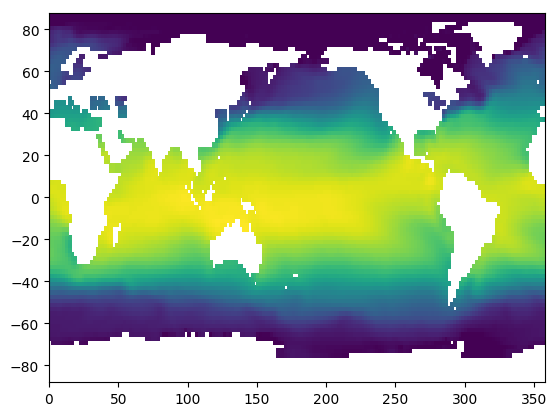

PyObject <matplotlib.collections.PolyCollection object at 0x7f671c574b00>

In [12]:
#pcolor(lon,lat,SST')
pcolor(lon,lat,copy(SST'))


In [15]:
close(ds)

In [34]:
using Printf

SST = zeros(180, 89, 12)
n = 1;

for year = 2016:2016
#for year = 1900:2000
   for month = 1:12
      global n
      month_str = @sprintf("%02d",month)
      url = "https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/ersst/L4/ncei/v3b/monthly/netcdf/$(year)/ersst.$(year)$(month_str).nc"
      @show url  
      ds = Dataset(url)
      SST[:,:,n] = nomissing(ds["sst"][:,:,1,1],NaN);
      n = n+1
      close(ds)
    end
end

url = "https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/ersst/L4/ncei/v3b/monthly/netcdf/2016/ersst.201601.nc"
url = "https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/ersst/L4/ncei/v3b/monthly/netcdf/2016/ersst.201602.nc"
url = "https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/ersst/L4/ncei/v3b/monthly/netcdf/2016/ersst.201603.nc"
url = "https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/ersst/L4/ncei/v3b/monthly/netcdf/2016/ersst.201604.nc"
url = "https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/ersst/L4/ncei/v3b/monthly/netcdf/2016/ersst.201605.nc"
url = "https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/ersst/L4/ncei/v3b/monthly/netcdf/2016/ersst.201606.nc"
url = "https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/ersst/L4/ncei/v3b/monthly/netcdf/2016/ersst.201607.nc"
url = "https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/ersst/L4/ncei/v3b/monthly/netcdf/2016/ersst.201608.nc"
url = "https://podaac-opendap.jpl.nasa.gov:443/opendap/a

In [37]:
size(SST)

(180, 89, 12)

In [40]:
lon[29]

56.0

In [42]:
findfirst(lon .== 56)

29

In [41]:
lat[20]

-50.0

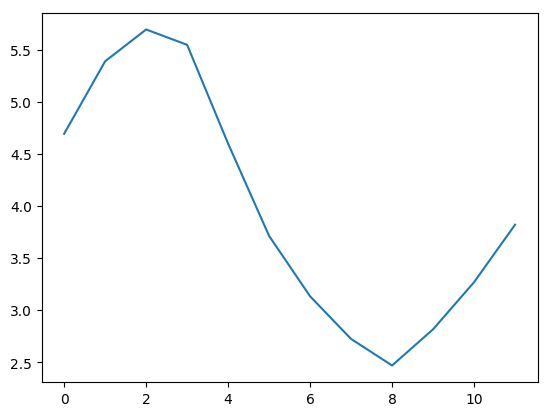

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6717be9630>

In [39]:
plot(SST[29,20,:])